## Python statistics essential training - 03_08_email

Standard imports

In [59]:
import numpy as np
import scipy.stats
import pandas as pd

In [60]:
import matplotlib
import matplotlib.pyplot as pp

import pandas.plotting

from IPython import display
from ipywidgets import interact, widgets

%matplotlib inline

In [61]:
import re
import mailbox
import csv
import datetime as dt

### How I converted my mailbox.

In [62]:
mbox = mailbox.mbox('Sent.mbox')

The resulting object is array-like, with one entry per message. Each entry is dictionary like, with keys corresponding to metadata and data for each message.

In [ ]:
mbox[0].keys()

The easiest way to get these data into Pandas is to build a CSV file from them. We use the module `csv` to write out the CSV file as we loop over the mailbox object. We save only subject, from, to, and date, and we write a simple header at the top with the names of columns.

In [63]:
with open('mbox.csv', 'w') as outfile:
    writer = csv.writer(outfile)
    writer.writerow(['subject','from','to','date'])
    
    for message in mbox:
        writer.writerow([message['subject'], message['from'], message['to'], message['date']])

All done! Thanks to Justin Ellis for inspiration with https://jellis18.github.io/post/2018-01-17-mail-analysis.

## Moving on!

In [64]:
messages = pd.read_csv('mbox-anonymized.csv')

In [65]:
messages=pd.read_csv('mbox-anonymized.csv')

In [66]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 4 columns):
subject    1030 non-null object
from       1029 non-null object
to         1030 non-null object
date       1030 non-null object
dtypes: object(4)
memory usage: 32.3+ KB


In [67]:
messages.head()

,subject,from,to,date
0,Why control quickly exactly capital.,"""Vallisneri, Michele (335S)"" <Michele.Vallisne...","""Trevor Charles"" <zrodriguez@hotmail.com>","Mon, 27 Nov 2017 14:18:46 -0800"
1,Work evidence from really threat sign store see.,Michele Vallisneri <Michele.Vallisneri@jpl.nas...,"""Heather Hernandez"" <patriciagarcia@garcia-car...","Mon, 26 Mar 2018 18:38:16 -0700"
2,Lot where answer the law person.,"""Vallisneri, Michele (335S)"" <michele.vallisne...",Bryce Dudley <hailey63@frazier.com>,"Tue, 13 Feb 2018 22:54:50 +0000"
3,Difference hotel yard.,"""Vallisneri, Michele (335S)"" <Michele.Vallisne...",Kathryn Mathis <josephrebecca@grimes.com>,"Fri, 26 Jan 2018 11:40:04 -0800"
4,Long level mission energy candidate.,"""Vallisneri, Michele (335S)"" <michele.vallisne...","""Angela Mendoza"" <rkhan@yahoo.com>","Tue, 31 Oct 2017 00:13:00 +0000"


In [68]:
messages['from'][0]

'"Vallisneri, Michele (335S)" <Michele.Vallisneri@jpl.nasa.gov>'

In [69]:
re.search('<(.+)>',messages['from'][0])

<_sre.SRE_Match object; span=(29, 62), match='<Michele.Vallisneri@jpl.nasa.gov>'>

In [70]:
re.search('<(.+)>',messages['from'][0]).group(0)

'<Michele.Vallisneri@jpl.nasa.gov>'

In [71]:
re.search('<(.+)>',messages['from'][0]).group(1)

'Michele.Vallisneri@jpl.nasa.gov'

In [72]:
def clean_address(raw):
    match = re.search('<(.+)>',raw)
    
    if match is None:
        return raw
    else:
        return match.group(1)

In [73]:
clean_address(messages['from'][0])

'Michele.Vallisneri@jpl.nasa.gov'

In [ ]:
messages['from'] = messages['from'].apply(clean_address)

In [ ]:
%debug


In [74]:
messages['from'] = messages['from'].dropna().apply(clean_address)
messages['to'] = messages['to'].dropna().apply(clean_address)

In [75]:
messages.head()

,subject,from,to,date
0,Why control quickly exactly capital.,Michele.Vallisneri@jpl.nasa.gov,zrodriguez@hotmail.com,"Mon, 27 Nov 2017 14:18:46 -0800"
1,Work evidence from really threat sign store see.,Michele.Vallisneri@jpl.nasa.gov,patriciagarcia@garcia-carney.com,"Mon, 26 Mar 2018 18:38:16 -0700"
2,Lot where answer the law person.,michele.vallisneri@jpl.nasa.gov,hailey63@frazier.com,"Tue, 13 Feb 2018 22:54:50 +0000"
3,Difference hotel yard.,Michele.Vallisneri@jpl.nasa.gov,josephrebecca@grimes.com,"Fri, 26 Jan 2018 11:40:04 -0800"
4,Long level mission energy candidate.,michele.vallisneri@jpl.nasa.gov,rkhan@yahoo.com,"Tue, 31 Oct 2017 00:13:00 +0000"


In [76]:
messages['date'][0]

'Mon, 27 Nov 2017 14:18:46 -0800'

In [77]:
pd.to_datetime(messages['date'][0])

Timestamp('2017-11-27 14:18:46-0800', tz='pytz.FixedOffset(-480)')

In [78]:
messages['date'] = messages['date'].apply(lambda s: pd.to_datetime(s,utc=True))

In [79]:
messages.date.head()

0   2017-11-27 22:18:46+00:00
1   2018-03-27 01:38:16+00:00
2   2018-02-13 22:54:50+00:00
3   2018-01-26 19:40:04+00:00
4   2017-10-31 00:13:00+00:00
Name: date, dtype: datetime64[ns, UTC]

In [80]:
messages.date.min(), messages.date.max()

(Timestamp('2017-07-01 06:26:52+0000', tz='UTC'),
 Timestamp('2018-05-13 15:40:20+0000', tz='UTC'))

In [81]:
messages.date.dt.weekday_name.head()

0     Monday
1    Tuesday
2    Tuesday
3     Friday
4    Tuesday
Name: date, dtype: object

In [86]:
messages['dayofweek'] = pd.Categorical(messages['date'].dt.weekday_name,
                                       ordered=True,
                                       categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

In [87]:
messages.head()

,subject,from,to,date,dayofweek
0,Why control quickly exactly capital.,Michele.Vallisneri@jpl.nasa.gov,zrodriguez@hotmail.com,2017-11-27 22:18:46+00:00,Monday
1,Work evidence from really threat sign store see.,Michele.Vallisneri@jpl.nasa.gov,patriciagarcia@garcia-carney.com,2018-03-27 01:38:16+00:00,Tuesday
2,Lot where answer the law person.,michele.vallisneri@jpl.nasa.gov,hailey63@frazier.com,2018-02-13 22:54:50+00:00,Tuesday
3,Difference hotel yard.,Michele.Vallisneri@jpl.nasa.gov,josephrebecca@grimes.com,2018-01-26 19:40:04+00:00,Friday
4,Long level mission energy candidate.,michele.vallisneri@jpl.nasa.gov,rkhan@yahoo.com,2017-10-31 00:13:00+00:00,Tuesday


In [88]:
messages['timeofday'] = messages['date'].dt.hour + messages['date'].dt.minute / 60

In [89]:
messages.head()

,subject,from,to,date,dayofweek,timeofday
0,Why control quickly exactly capital.,Michele.Vallisneri@jpl.nasa.gov,zrodriguez@hotmail.com,2017-11-27 22:18:46+00:00,Monday,22.300000
1,Work evidence from really threat sign store see.,Michele.Vallisneri@jpl.nasa.gov,patriciagarcia@garcia-carney.com,2018-03-27 01:38:16+00:00,Tuesday,1.633333
2,Lot where answer the law person.,michele.vallisneri@jpl.nasa.gov,hailey63@frazier.com,2018-02-13 22:54:50+00:00,Tuesday,22.900000
3,Difference hotel yard.,Michele.Vallisneri@jpl.nasa.gov,josephrebecca@grimes.com,2018-01-26 19:40:04+00:00,Friday,19.666667
4,Long level mission energy candidate.,michele.vallisneri@jpl.nasa.gov,rkhan@yahoo.com,2017-10-31 00:13:00+00:00,Tuesday,0.216667


In [90]:
messages['nyear'] = messages['date'].dt.year + messages['date'].dt.dayofyear/365.25 + messages['timeofday']/24/365.25 

In [91]:
messages.head()

,subject,from,to,date,dayofweek,timeofday,nyear
0,Why control quickly exactly capital.,Michele.Vallisneri@jpl.nasa.gov,zrodriguez@hotmail.com,2017-11-27 22:18:46+00:00,Monday,22.300000,2017.908773
1,Work evidence from really threat sign store see.,Michele.Vallisneri@jpl.nasa.gov,patriciagarcia@garcia-carney.com,2018-03-27 01:38:16+00:00,Tuesday,1.633333,2018.235641
2,Lot where answer the law person.,michele.vallisneri@jpl.nasa.gov,hailey63@frazier.com,2018-02-13 22:54:50+00:00,Tuesday,22.900000,2018.123078
3,Difference hotel yard.,Michele.Vallisneri@jpl.nasa.gov,josephrebecca@grimes.com,2018-01-26 19:40:04+00:00,Friday,19.666667,2018.073428
4,Long level mission energy candidate.,michele.vallisneri@jpl.nasa.gov,rkhan@yahoo.com,2017-10-31 00:13:00+00:00,Tuesday,0.216667,2017.832331


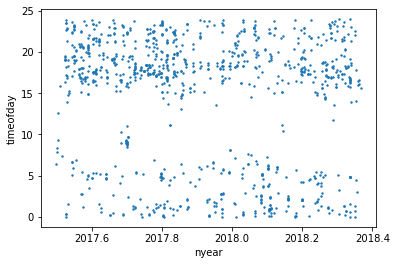

In [92]:
messages.plot.scatter('nyear','timeofday',s=2)

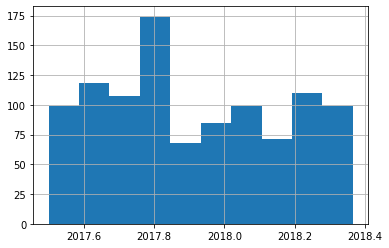

In [93]:
messages.nyear.hist()

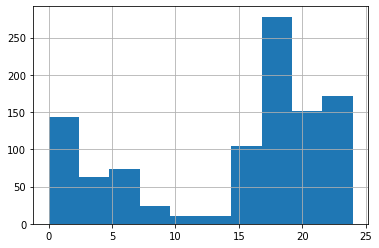

In [94]:
messages.timeofday.hist()

In [95]:
messages.dayofweek.value_counts()

Tuesday      227
Wednesday    222
Thursday     189
Monday       164
Friday       157
Saturday      51
Sunday        20
Name: dayofweek, dtype: int64

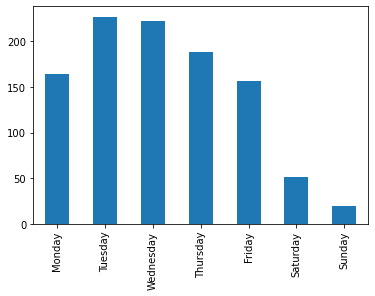

In [97]:
counts = messages.dayofweek.value_counts(sort=False)
counts.plot(kind='bar')